In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


In [2]:
# Load the dataset
file_path = '/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'  
df = pd.read_csv(file_path)
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Calculate descriptive statistics
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [4]:
# Identify Missig Values
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [5]:
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [6]:
#Replacing null values with average 'Open'
media_open = df['Open'].fillna(df['Open'].mean())
print(media_open)

0              4.39000
1           6009.02368
2           6009.02368
3           6009.02368
4           6009.02368
              ...     
4857372    58714.31000
4857373    58683.97000
4857374    58693.43000
4857375    58742.18000
4857376    58767.75000
Name: Open, Length: 4857377, dtype: float64


In [7]:
# Replacing null values with average 'High'
media_high = df['High'].fillna(df['High'].mean())
print(media_high)

0              4.390000
1           6013.357082
2           6013.357082
3           6013.357082
4           6013.357082
               ...     
4857372    58714.310000
4857373    58693.430000
4857374    58723.840000
4857375    58770.380000
4857376    58778.180000
Name: High, Length: 4857377, dtype: float64


In [8]:
# Replacing null values with average 'Low'
media_low = df['Low'].fillna(df['Low'].mean())
print(media_low)

0              4.390000
1           6004.488004
2           6004.488004
3           6004.488004
4           6004.488004
               ...     
4857372    58686.000000
4857373    58683.970000
4857374    58693.430000
4857375    58742.180000
4857376    58755.970000
Name: Low, Length: 4857377, dtype: float64


In [9]:
# Replacing null values with average 'Close'
media_close = df['Close'].fillna(df['Close'].mean())
print(media_close)

0              4.390000
1           6009.013545
2           6009.013545
3           6009.013545
4           6009.013545
               ...     
4857372    58686.000000
4857373    58685.810000
4857374    58723.840000
4857375    58760.590000
4857376    58778.180000
Name: Close, Length: 4857377, dtype: float64


In [10]:
# Fill values with previous values
replacing_btc_fill = df['Volume_(BTC)'].fillna(method='ffill')
print(replacing_btc_fill)

0          0.455581
1          0.455581
2          0.455581
3          0.455581
4          0.455581
             ...   
4857372    1.384487
4857373    7.294848
4857374    1.705682
4857375    0.720415
4857376    2.712831
Name: Volume_(BTC), Length: 4857377, dtype: float64


In [11]:
# Fill values with previous values
replacing_currency = df['Volume_(Currency)'].fillna(method='ffill')
print(replacing_currency)

0               2.000000
1               2.000000
2               2.000000
3               2.000000
4               2.000000
               ...      
4857372     81259.372187
4857373    428158.146640
4857374    100117.070370
4857375     42332.958633
4857376    159417.751000
Name: Volume_(Currency), Length: 4857377, dtype: float64


In [12]:
#Drop nan in Weighted_Price
cleaned_Weighted_Price = df['Weighted_Price'].dropna()

print(cleaned_Weighted_Price)

0              4.390000
478            4.390000
547            4.526411
548            4.580000
1224           4.580000
               ...     
4857372    58692.753339
4857373    58693.226508
4857374    58696.198496
4857375    58761.866202
4857376    58764.349363
Name: Weighted_Price, Length: 3613769, dtype: float64


Statistical Summary:
Open = media_open     
High = media_high   
Low  = media_low   
Close = media_close   
Volume_(BTC) = replacing_btc_fill
Volume_(Currency) = replacing_currency
Weighted_Price = cleaned_Weighted_Price 

In [13]:
# Statistical summary  before cleaning
print(df['High'].describe())

# Statitical summary after cleaning
media_high.describe()

count    3.613769e+06
mean     6.013357e+03
std      9.003521e+03
min      3.800000e+00
25%      4.440000e+02
50%      3.598190e+03
75%      8.632980e+03
max      6.178183e+04
Name: High, dtype: float64


count    4.857377e+06
mean     6.013357e+03
std      7.765898e+03
min      3.800000e+00
25%      6.309700e+02
50%      6.013357e+03
75%      7.199780e+03
max      6.178183e+04
Name: High, dtype: float64

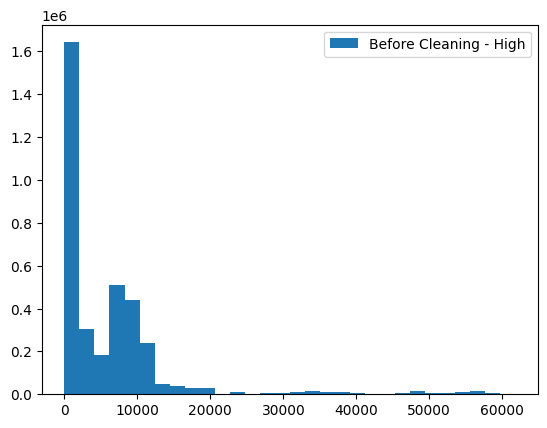

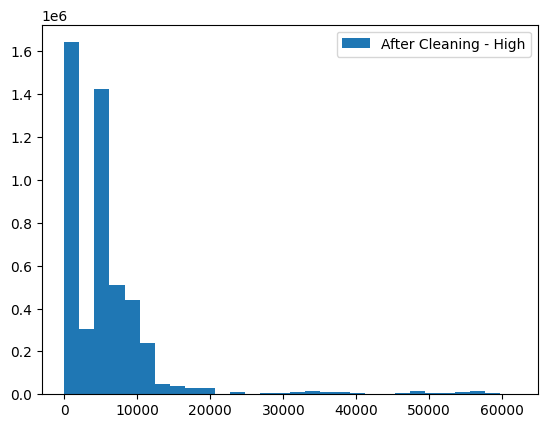

In [14]:
# Graphic Visualizations:
import matplotlib.pyplot as plt

# Histogram before cleaning
plt.hist(df['High'], bins=30, label='Before Cleaning - High')
plt.legend()
plt.show()

# histogram after cleaning
plt.hist(media_high, bins=30, label='After Cleaning - High')
plt.legend()
plt.show()

In [15]:
# Statical summary before cleaning
print(df['Low'].describe())

#Statical summary after cleaning
print(media_low.describe())

count    3.613769e+06
mean     6.004488e+03
std      8.988778e+03
min      1.500000e+00
25%      4.435200e+02
50%      3.595620e+03
75%      8.621090e+03
max      6.167355e+04
Name: Low, dtype: float64
count    4.857377e+06
mean     6.004488e+03
std      7.753181e+03
min      1.500000e+00
25%      6.300000e+02
50%      6.004488e+03
75%      7.191260e+03
max      6.167355e+04
Name: Low, dtype: float64


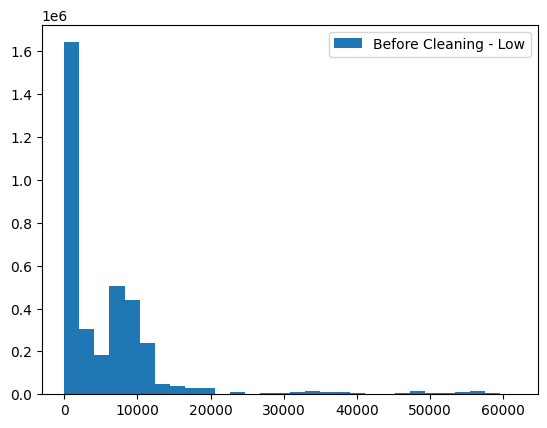

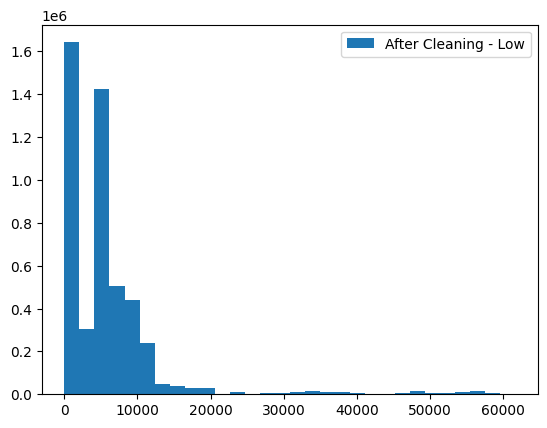

In [16]:
# Graphic Visualizations:

#Histogram before cleaning

plt.hist(df['Low'], bins=30, label = "Before Cleaning - Low")
plt.legend()
plt.show()

#Histogram after cleaning

plt.hist(media_low, bins=30, label= "After Cleaning - Low")
plt.legend()
plt.show()

In [17]:
# Statistical close before cleaning
print(df['Close'].describe())

# Stastitcal close afeter cleaning
print(media_close)

count    3.613769e+06
mean     6.009014e+03
std      8.996360e+03
min      1.500000e+00
25%      4.438600e+02
50%      3.597000e+03
75%      8.627160e+03
max      6.178180e+04
Name: Close, dtype: float64
0              4.390000
1           6009.013545
2           6009.013545
3           6009.013545
4           6009.013545
               ...     
4857372    58686.000000
4857373    58685.810000
4857374    58723.840000
4857375    58760.590000
4857376    58778.180000
Name: Close, Length: 4857377, dtype: float64


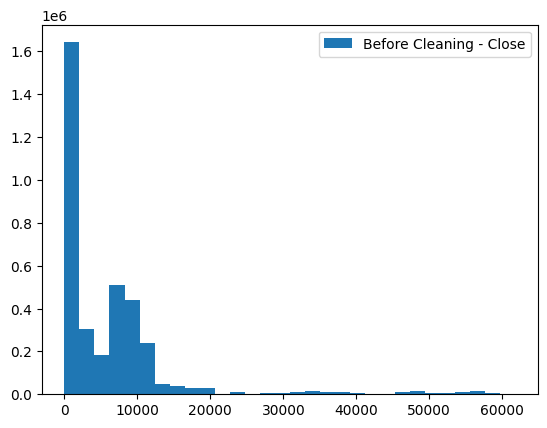

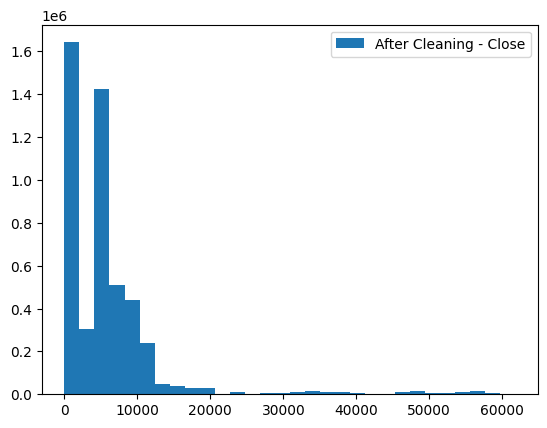

In [18]:
# Histogram before cleaning
plt.hist(df['Close'], bins=30, label="Before Cleaning - Close")
plt.legend()
plt.show()

#Histrogram afeter cleaning
plt.hist(media_close, bins=30, label="After Cleaning - Close")
plt.legend()
plt.show()

In [19]:
# Statistical summary before cleaning
print(df['Volume_(BTC)'].describe())

# Statistical Summary after Cleaning
print(replacing_btc_fill.describe())

count    3.613769e+06
mean     9.323249e+00
std      3.054989e+01
min      0.000000e+00
25%      4.097759e-01
50%      1.979811e+00
75%      7.278216e+00
max      5.853852e+03
Name: Volume_(BTC), dtype: float64
count    4.857377e+06
mean     9.474175e+00
std      3.064199e+01
min      0.000000e+00
25%      4.070040e-01
50%      2.000000e+00
75%      7.560355e+00
max      5.853852e+03
Name: Volume_(BTC), dtype: float64


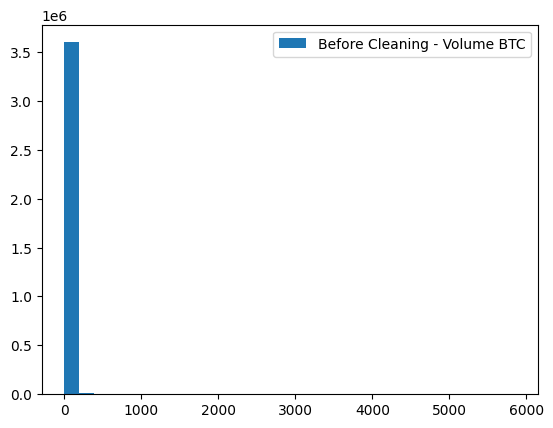

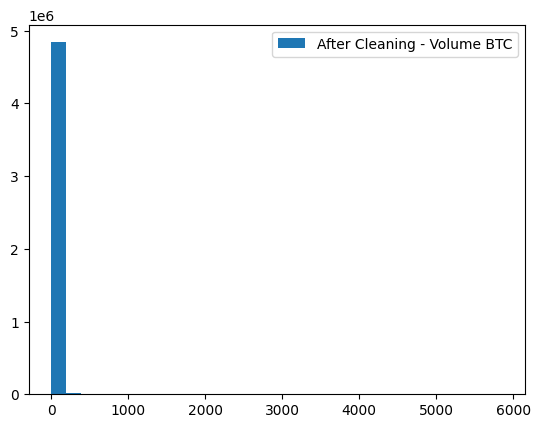

In [20]:
# Histogram before cleaning
plt.hist(df['Volume_(BTC)'], bins=30, label="Before Cleaning - Volume BTC")
plt.legend()
plt.show()

# Histogram after Cleaning
plt.hist(replacing_btc_fill, bins=30, label="After Cleaning - Volume BTC")
plt.legend()
plt.show()

In [21]:
# Statistical Summary before Cleaning
print(df['Volume_(Currency)'].describe())

# Statistical Summary after Cleaning
print(replacing_currency.describe())

count    3.613769e+06
mean     4.176284e+04
std      1.518248e+05
min      0.000000e+00
25%      4.521422e+02
50%      3.810124e+03
75%      2.569821e+04
max      1.390067e+07
Name: Volume_(Currency), dtype: float64
count    4.857377e+06
mean     3.140243e+04
std      1.321901e+05
min      0.000000e+00
25%      1.425400e+02
50%      1.333339e+03
75%      1.414038e+04
max      1.390067e+07
Name: Volume_(Currency), dtype: float64


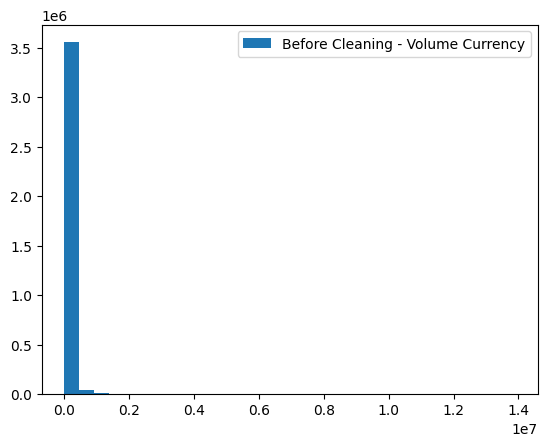

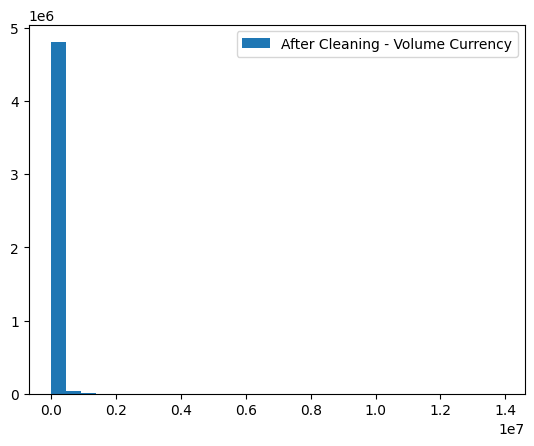

In [22]:
# Histogram Volume Currency before Cleaning
plt.hist(df['Volume_(Currency)'], bins=30, label="Before Cleaning - Volume Currency")
plt.legend()
plt.show()

# Histogram Volume Currency After Cleaning
plt.hist(replacing_currency, bins=30, label="After Cleaning - Volume Currency")
plt.legend()
plt.show()

In [23]:
# Statistical Summary Weighted_Price Before Cleaning
print(df['Weighted_Price'].describe())

# Statistical Summary after Cleaning
print(cleaned_Weighted_Price.describe())

count    3.613769e+06
mean     6.008935e+03
std      8.995992e+03
min      3.800000e+00
25%      4.438306e+02
50%      3.596804e+03
75%      8.627637e+03
max      6.171621e+04
Name: Weighted_Price, dtype: float64
count    3.613769e+06
mean     6.008935e+03
std      8.995992e+03
min      3.800000e+00
25%      4.438306e+02
50%      3.596804e+03
75%      8.627637e+03
max      6.171621e+04
Name: Weighted_Price, dtype: float64


In [24]:
# Average before and after drop
print("Media before cleaning", df['Weighted_Price'].mean())
print("Media after cleaning", cleaned_Weighted_Price.mean())

Media before cleaning 6008.934800288798
Media after cleaning 6008.934800288798
